# Useful resources:

https://github.com/jakevdp/PythonDataScienceHandbook - Data Science textbook all in iPython notebooks; much of the text borrowed from here

https://xenabrowser.net/ - Where I got TCGA PANCAN data

First, let's import what we need to work with our data:

In [2]:
import pandas as pd # Pandas!
import numpy as np # Numpy!
import sklearn # sci-kit learn
import matplotlib.pyplot as plt # plotting with matplotlib
import seaborn as sns; sns.set() # seaborn library makes our plots prettier

# Pandas

Pandas is a newer package built on top of NumPy, a powerful N-dimensional array object, and provides an efficient implementation of a ``DataFrame``.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

Load our data. This will take some time...

In [4]:
# Load the data
test_df = pd.read_csv('', sep='', compression='', index_col='Unnamed: 0')

The data consists of RPSM values of 4000 patient's RSEM normalized transcript counts for thousands of genes. We can view this by simply calling the name of the ``DataFrame``:

In [5]:
# View the DataFrame here

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,cancer_type,tumour
TCGA-S9-A7J2-01,10.9576,4.8099,0.4657,11.2675,10.1761,10.4769,13.0456,3.2299,0.4657,8.7533,...,2.9741,0.0000,9.2594,9.4779,6.1595,9.6465,0.0000,9.4848,Brain Lower Grade Glioma,True
TCGA-G3-A3CH-11,11.0186,5.3847,0.0000,11.6690,11.3980,10.8249,11.5487,3.5408,1.4714,7.9144,...,5.5302,0.0000,7.5066,10.5302,7.3741,13.0045,7.0466,10.3411,Liver hepatocellular carcinoma,False
TCGA-EK-A2RE-01,9.7106,2.8888,0.4192,11.4903,11.7371,9.9473,10.8410,2.5988,0.0000,3.9541,...,2.9530,1.2319,9.5217,13.8492,6.5812,9.2958,0.4192,9.7450,Cervical squamous cell carcinoma and endocervi...,True
TCGA-44-6778-01,9.6205,7.9642,1.5378,11.8432,11.0531,10.9005,12.4145,4.5366,2.0609,4.1805,...,6.1839,4.1291,8.9832,12.3412,9.0862,10.4779,9.4517,10.4395,Lung adenocarcinoma,True
TCGA-VM-A8C8-01,11.6596,8.5622,0.0000,11.2677,11.3549,10.8579,13.2560,5.9962,0.0000,5.3570,...,4.7530,0.6034,9.0573,8.8984,5.9116,9.9584,1.6216,9.6811,Brain Lower Grade Glioma,True
TCGA-AB-2863-03,0.7316,1.2147,0.0000,11.7164,10.4861,10.2824,12.3015,0.0000,3.7602,3.7602,...,1.2147,0.7316,7.8508,7.5741,1.5760,10.4781,3.3571,8.1381,Acute Myeloid Leukemia,True
TCGA-C8-A1HL-01,9.2845,2.3590,2.7396,12.4102,11.1902,10.2586,12.9611,4.5988,0.0000,5.4881,...,4.2532,0.0000,9.6590,11.9725,9.9002,11.8836,6.5535,10.7800,Breast invasive carcinoma,True
TCGA-EE-A17X-06,8.4529,3.9888,0.0000,12.3562,9.7486,9.3268,11.5191,3.4802,1.0625,5.4653,...,2.9129,0.0000,10.7145,11.3173,5.2620,10.7944,4.4624,9.8660,Skin Cutaneous Melanoma,True
TCGA-YB-A89D-11,10.2648,5.7145,0.0000,11.6663,10.8571,10.5055,12.0186,5.2155,0.0000,5.7281,...,6.7347,0.0000,8.9751,14.0698,9.9786,11.3966,8.6139,10.5352,Pancreatic adenocarcinoma,False
TCGA-05-4420-01,8.0441,6.1856,0.3369,12.1090,11.6214,10.5407,12.2845,4.9284,0.0000,8.4269,...,4.3730,3.3510,9.9638,11.2428,7.4256,9.5281,5.9604,11.5229,Lung adenocarcinoma,True


# Machine Learning

Fundamentally, machine learning involves building mathematical models to help understand data.
"Learning" enters the fray when we give these models *tunable parameters* that can be adapted to observed data; in this way the program can be considered to be "learning" from the data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

# Split the Data

What is the dependant variable and what are the independant variables?

In [6]:
from sklearn.model_selection import train_test_split

X = test_df.iloc[:, test_df.columns != 'cancer_type']
y = test_df['cancer_type']

Let's split this into a training set and a testing set

In [7]:
# Use the train_test_split function to split into a training and testing dataset

# Supervised vs. Unsupervised

*Supervised learning* involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.
This is further subdivided into *classification* tasks and *regression* tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.
We will see examples of both types of supervised learning in the following section.

*Unsupervised learning* involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction.*
Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.
We will see examples of both types of unsupervised learning in the following section.

*Classification* is a supervised learning problem in which you are given a set of labeled points and want to use these to classify some unlabeled points. The problem of determining cancer type with transcript data is a classification problem.

# Visualizing the Data

Before a classification job, it's often helpful to visualize the data so we can understand how distinctly clustered it is. For low-dimensional data this is a fairly easy task. We can either graph it directly on a scatterplot, or use *principle component analysis (PCA)* to "summarize" the data in less dimensions. PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization. It is also used for noise filtering, for feature extraction and engineering, and much more.

Let's run PCA with two components on our dataset, and then visualize it with a scatterplot

In [8]:
def word_to_value(word):
    value = 0
    for letter in word:
        value = value + ord(letter)
    return value
word_to_value_vect = np.vectorize(word_to_value)

In [9]:
from sklearn.decomposition import PCA
# Use PCA to change our dataset from 20000+ features to 2 features
pca_model = 
X_pca = 

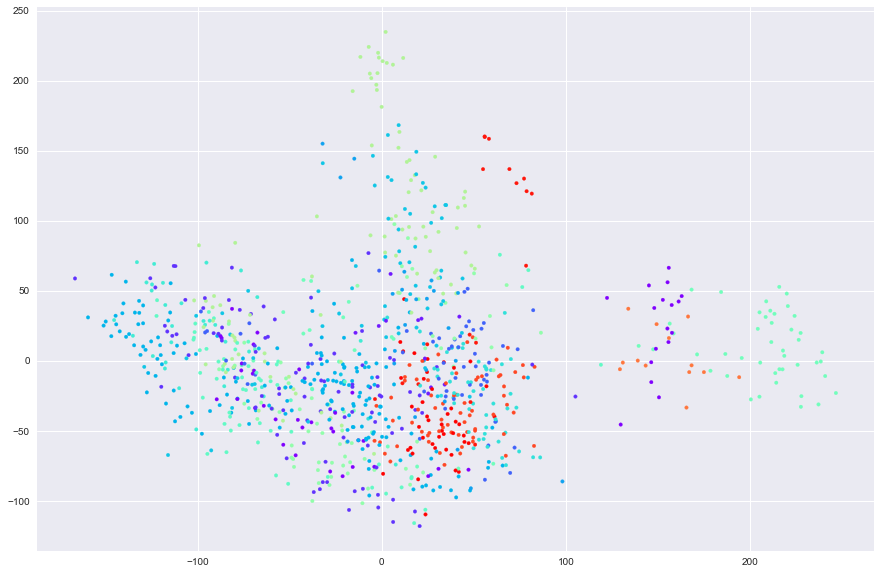

In [12]:
# Let's see if we can make out some clusters visually
num_of_cancers = len(np.unique(y))
colors = [int(i % num_of_cancers) for i in word_to_value_vect(y)]
plt.figure(figsize=[15,10])
plt.scatter(X_pca[:,0], X_pca[:,2], marker = r'.', c=colors, cmap='rainbow')
plt.show()

As you can see, even with PCA it's very difficult to visualize our dataset. It simply has too many features (20,000+ genes) for the amount of samples. Instead, let's make a running example of a dataset that can help visualize what our methods are doing.

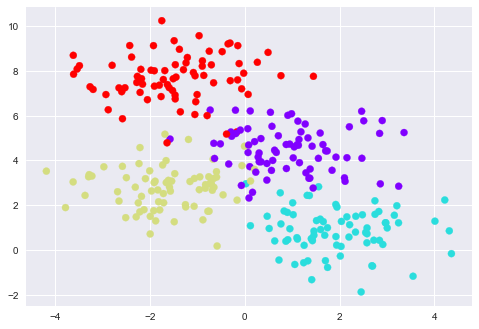

In [15]:
from sklearn.datasets import make_blobs
X_blob, y_blob = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
#X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, random_state=4)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, s=50, cmap='rainbow');
plt.show()

# Decision Trees

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification. Decision trees are used everyday by non-programmers. For example, species classification for biologists.

In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.

Now that we have our data, let's run a Decision Tree to see if we can determine which cancer is which.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Create the decision tree model for the cancer dataset and for the blob dataset
decision_tree =
decision_tree_blob =

In [18]:
# Fit the models to their respective data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
# How well does the cancer set perform?
# Test the model with the testing set using the score function.

0.752

Over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

In [20]:
# A nice method to visualize classification from the Data Science textbook
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [21]:
visualize_classifier(decision_tree_blob, X_blob, y_blob)

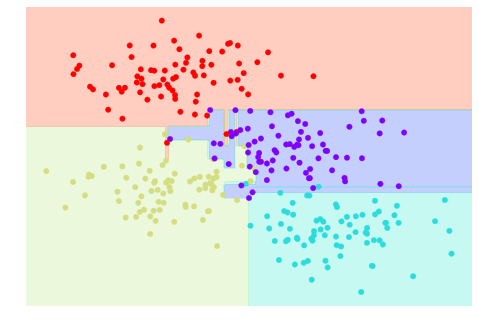

In [22]:
plt.show()

# Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

Let's use a random forest of 50 decision trees to see if it performs any better than our decision tree.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Make models for the cancer dataset, and for the blob dataset
cancer_model =
blob_model =

In [25]:
# Fit the respective models to their data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [26]:
# Score the cancer dataset, is it better than a decision tree on it's own?

0.88400000000000001

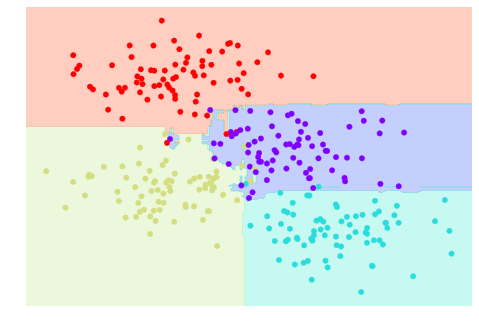

In [27]:
visualize_classifier(blob_model, X_blob, y_blob)
plt.show()

## Summary of Random Forests

Random forests are a powerful method with several advantages:

- Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.
- The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the ``predict_proba()`` method).
- The nonparametric model is extremely flexible, and can thus perform well on tasks that are under-fit by other estimators.

A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the *meaning* of the classification model, random forests may not be the best choice.